                            Machine Learning with Imbalanced Dataset

IMBALANCED DATASET - The dataset may contain uneven samples /instances , so that it makes the algorithm to predict with accuracy of 1.0 each time u run the model. For example, if u have simple dataset with 4 features and output(target) feature with 2 class, then total no. of instances/samples be 100. Now, out of 100, 80 instances belongs to category1 of the output(target) feature and only 20 instances contribute to the category2 of the output(target) feature. So, obviously, this makes bias in training and predicting the model. So, this dataset refers to Imbalanced dataset.

Importing Neccessary Packages and reading the csv file and printing the head of the csv file.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

file = pd.read_csv("ecoli.csv",sep=',')
print(file.head())

    Mcg   Gvh   Lip  Chg   Aac  Alm1  Alm2     Class
0  0.49  0.29  0.48  0.5  0.56  0.24  0.35  positive
1  0.07  0.40  0.48  0.5  0.54  0.35  0.44  positive
2  0.56  0.40  0.48  0.5  0.49  0.37  0.46  positive
3  0.59  0.49  0.48  0.5  0.52  0.45  0.36  positive
4  0.23  0.32  0.48  0.5  0.55  0.25  0.35  positive


In [2]:
Checking whether any column in the dataset contains NaN values.

SyntaxError: invalid syntax (<ipython-input-2-3212d20c9490>, line 1)

In [3]:
file.isnull().values.any()

False

Computing the Basic Statistics(Descriptive) of the "Class" feature in the dataset. It shows that there are two unique values(positive and negative), with positive value counts upto 143 and negative 77.

In [4]:
file['Class'].describe()

count          220
unique           2
top       positive
freq           143
Name: Class, dtype: object

Now, we just grouped the datset based on the 'class' feature to visualize the counts of positive and negative values.

In [5]:
f = file.groupby("Class")
f.count()

,Mcg,Gvh,Lip,Chg,Aac,Alm1,Alm2
Class,,,,,,,
negative,77,77,77,77,77,77,77
positive,143,143,143,143,143,143,143


We are converting the 'class' feature from text to int using .map function.

In [12]:
file['Class'] = file['Class'].map({'positive': 1, 'negative': 0})
print(file['Class'].head())

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64


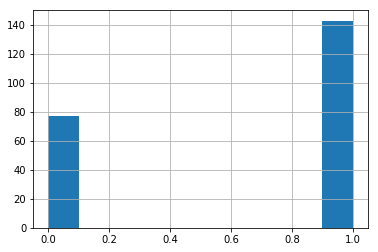

In [13]:
file['Class'].hist()

Now using the sklearn library, we import train_test_test from cross validation and split the original dataset into training and test dataset(80,20).

In [3]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(file,test_size=0.2)
features_train=train[['Mcg','Gvh','Lip','Chg','Aac','Alm1','Alm2']]
features_test = test[['Mcg','Gvh','Lip','Chg','Aac','Alm1','Alm2']]
labels_train = train.Class
labels_test = test.Class
print(train.shape)
print(test.shape)
print(features_train.shape)
print(features_test.shape)
print(labels_train.shape)
print(labels_test.shape)
print(labels_test.head())

(176, 8)
(44, 8)
(176, 7)
(44, 7)
(176,)
(44,)
99     1
137    1
65     1
124    1
12     1
Name: Class, dtype: int64


C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Now we compute the accuracy of the noraml model using various classifiers, but it clearly shows that most of the ML algorithm predicts with the accuracy of 1.0.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
names = ['GaussianNB','SVM Linear','SVM Rbf','SVM Poly','SVM Linear C','SVM Rbf C','SVM Poly C','Decision tree','Decision tree with minsample','k neighbors','k neighbors with n']
classifiers = [GaussianNB(),
               SVC(kernel="linear"),
               SVC(kernel="rbf"),
               SVC(kernel="poly"),
               SVC(kernel="linear", C=1000),
               SVC(kernel="rbf", C=1000),
               SVC(kernel="poly", C=1000),
               DecisionTreeClassifier(),
               DecisionTreeClassifier(min_samples_split=5),
               KNeighborsClassifier(),
               KNeighborsClassifier(n_neighbors=2),
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
               AdaBoostClassifier()]
for name,clf in zip(names,classifiers):
    clf.fit(features_train,labels_train)
    print("Accuracy:",clf.score(features_test,labels_test))

Accuracy: 0.954545454545
Accuracy: 0.977272727273
Accuracy: 0.954545454545
Accuracy: 0.886363636364
Accuracy: 1.0
Accuracy: 0.977272727273
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.977272727273


There two main ways to handle the Imbalanced datset:

1.Over Sampling
2.Under Sampling

OVER SAMPLING:
It is nothing but Sampling the minority class and making it equivalent to the majority class
Ex:before sampling: Counter({1: 111, 0: 65})
after sampling: Counter({1: 111, 0: 111})
Note:The counts of 1's and 0's before and after sampling


UNDER SAMPLING:
It is nothing but Sampling the majority class and making it equivalent to the minority class
Ex:before sampling: Counter({1: 111, 0: 65})
after sampling: Counter({0: 65, 1: 65})


There are several algorithms for over sampling and under sampling. The one we use here is,

OVER SAMPLING ALGORITHM:
1.SMOTE - Synthetic Minority Over Sampling Technique
A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models

UNDER SAMPLING ALGORITHM:
1.RandomUnderSampler - Random Undersampling aims to balance class distribution by randomly eliminating majority class examples.  This is done until the majority and minority class instances are balanced out.

2.NearMiss - selects the majority class samples whose average distances to three closest minority class samples are the smallest.

In [11]:
from collections import Counter
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(kind='borderline1').fit_sample(features_train, labels_train)
print("before sampling:",format(Counter(labels_train)))
print("after sampling:",format(Counter(y_resampled)))

before sampling: Counter({1: 111, 0: 65})
after sampling: Counter({1: 111, 0: 111})


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
names = ['GaussianNB','SVM Linear','SVM Rbf','SVM Poly','SVM Linear C','SVM Rbf C','SVM Poly C','Decision tree','Decision tree with minsample','k neighbors','k neighbors with n']
classifiers = [GaussianNB(),
               SVC(kernel="linear"),
               SVC(kernel="rbf"),
               SVC(kernel="poly"),
               SVC(kernel="linear", C=1000),
               SVC(kernel="rbf", C=1000),
               SVC(kernel="poly", C=1000),
               DecisionTreeClassifier(),
               DecisionTreeClassifier(min_samples_split=5),
               KNeighborsClassifier(),
               KNeighborsClassifier(n_neighbors=2),
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
               AdaBoostClassifier()]
for name,clf in zip(names,classifiers):
    clf.fit(X_resampled, y_resampled)
    print("Accuracy:",clf.score(features_test,labels_test))

Accuracy: 0.977272727273
Accuracy: 0.977272727273
Accuracy: 0.954545454545
Accuracy: 0.954545454545
Accuracy: 0.977272727273
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.977272727273


In [13]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_sample(features_train, labels_train)
print("before sampling:",format(Counter(labels_train)))
print("after sampling:",format(Counter(y_resampled)))

before sampling: Counter({1: 111, 0: 65})
after sampling: Counter({0: 65, 1: 65})


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
names = ['GaussianNB','SVM Linear','SVM Rbf','SVM Poly','SVM Linear C','SVM Rbf C','SVM Poly C','Decision tree','Decision tree with minsample','k neighbors','k neighbors with n']
classifiers = [GaussianNB(),
               SVC(kernel="linear"),
               SVC(kernel="rbf"),
               SVC(kernel="poly"),
               SVC(kernel="linear", C=1000),
               SVC(kernel="rbf", C=1000),
               SVC(kernel="poly", C=1000),
               DecisionTreeClassifier(),
               DecisionTreeClassifier(min_samples_split=5),
               KNeighborsClassifier(),
               KNeighborsClassifier(n_neighbors=2),
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
               AdaBoostClassifier()]
for name,clf in zip(names,classifiers):
    clf.fit(X_resampled, y_resampled)
    print("Accuracy:",clf.score(features_test,labels_test))

Accuracy: 0.977272727273
Accuracy: 0.977272727273
Accuracy: 0.977272727273
Accuracy: 0.954545454545
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.931818181818
Accuracy: 0.954545454545
Accuracy: 1.0
Accuracy: 0.931818181818


In [8]:
from collections import Counter
from imblearn.under_sampling import NearMiss
rus = NearMiss(random_state=42)
X_resampled, y_resampled = rus.fit_sample(features_train, labels_train)
print("before sampling:",format(Counter(labels_train)))
print("after sampling:",format(Counter(y_resampled)))


before sampling: Counter({1: 111, 0: 65})
after sampling: Counter({0: 65, 1: 65})


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
names = ['GaussianNB','SVM Linear','SVM Rbf','SVM Poly','SVM Linear C','SVM Rbf C','SVM Poly C','Decision tree','Decision tree with minsample','k neighbors','k neighbors with n']
classifiers = [GaussianNB(),
               SVC(kernel="linear"),
               SVC(kernel="rbf"),
               SVC(kernel="poly"),
               SVC(kernel="linear", C=1000),
               SVC(kernel="rbf", C=1000),
               SVC(kernel="poly", C=1000),
               DecisionTreeClassifier(),
               DecisionTreeClassifier(min_samples_split=5),
               KNeighborsClassifier(),
               KNeighborsClassifier(n_neighbors=2),
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
               AdaBoostClassifier()]
for name,clf in zip(names,classifiers):
    clf.fit(X_resampled, y_resampled)
    print("Accuracy:",clf.score(features_test,labels_test))

Accuracy: 0.977272727273
Accuracy: 0.977272727273
Accuracy: 0.954545454545
Accuracy: 0.886363636364
Accuracy: 1.0
Accuracy: 0.977272727273
Accuracy: 1.0
Accuracy: 0.977272727273
Accuracy: 0.977272727273
Accuracy: 1.0
Accuracy: 0.977272727273
